In [29]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit
from scipy.optimize import minimize

In [48]:
from sklearn.metrics import r2_score

In [5]:
x = np.array([.25, .5, 1, 1.5, 2, 4, 8, 12, 16])
y = np.array([43, 32, 20, 14, 11, 6.5, 2.8, 1.2, .52])

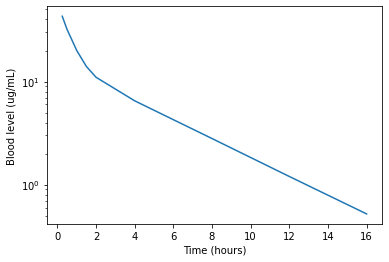

In [12]:
#plt.plot(x, y)
plt.semilogy(x, y)
plt.xlabel('Time (hours)')
plt.ylabel('Blood level (ug/mL)')
plt.show()

In [18]:
def func(t, a, alpha, b, beta):
    return a * np.exp(-alpha * t) + b * np.exp(-beta * t)

In [19]:
popt, pcov = curve_fit(func, x, y)

K:\Users\Connor\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [20]:
popt

array([14.50657245,  0.20539979, 44.85338264,  1.71823323])

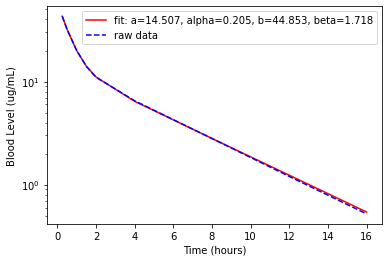

In [25]:
plt.semilogy(x, func(x, *popt), 'r-', label='fit: a=%5.3f, alpha=%5.3f, b=%5.3f, beta=%5.3f' % tuple(popt))
plt.semilogy(x, y, 'b--', label='raw data')
plt.xlabel('Time (hours)')
plt.ylabel('Blood Level (ug/mL)')
plt.legend()
plt.show()

In [160]:
def cost(params):
    a, alpha, b, beta = params
    model = func(x, *params)
    #reg = a**2 + alpha**2 + b**2 + beta**2
    reg = a**1.5 + b**1.5
    regweight = 1.0
    #return np.mean((model-y)**2) # quadratic cost function
    return np.mean((model - y)**2) + reg * regweight # quadratic cost function with regularization

In [161]:
p0 = [1, 1, 1, 1] # inital guesses for parameters
res = minimize(cost, p0)
print(res.x)

[12.36685783  0.26376687 12.36686417  0.2637669 ]


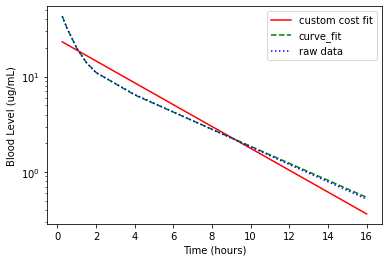

r_squared_custom_cost: 0.696813244681499
r_squared_curve_fit: 0.9999745153717008


In [162]:
plt.semilogy(x, func(x, *res.x), 'r-', label='custom cost fit')#'fit: a=%5.3f, alpha=%5.3f, b=%5.3f, beta=%5.3f' % tuple(res.x))
plt.semilogy(x, func(x, *popt), 'g--', label='curve_fit')#'fit: a=%5.3f, alpha=%5.3f, b=%5.3f, beta=%5.3f' % tuple(popt))
plt.semilogy(x, y, 'b:', label='raw data')
plt.xlabel('Time (hours)')
plt.ylabel('Blood Level (ug/mL)')
plt.legend()
plt.show()

r_squared_custom_cost = r2_score(y, func(x, *res.x))
print(f'r_squared_custom_cost: {r_squared_custom_cost}')
r_squared_curve_fit = r2_score(y, func(x, *popt))
print(f'r_squared_curve_fit: {r_squared_curve_fit}')